In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('Salary Data.csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
data = data[['Years of Experience', 'Salary']]
data.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [13]:
data.shape

(375, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  373 non-null    float64
 1   Salary               373 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


In [15]:
data = data.drop_duplicates()

In [17]:
data.shape

(155, 2)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 349
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  154 non-null    float64
 1   Salary               154 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB


In [37]:
data = data.dropna()

In [39]:
data['Years of Experience'].unique

<bound method Series.unique of 0       5.0
1       3.0
2      15.0
3       7.0
4      20.0
       ... 
316     6.0
341    18.0
343    14.0
347    19.0
349     8.0
Name: Years of Experience, Length: 154, dtype: float64>

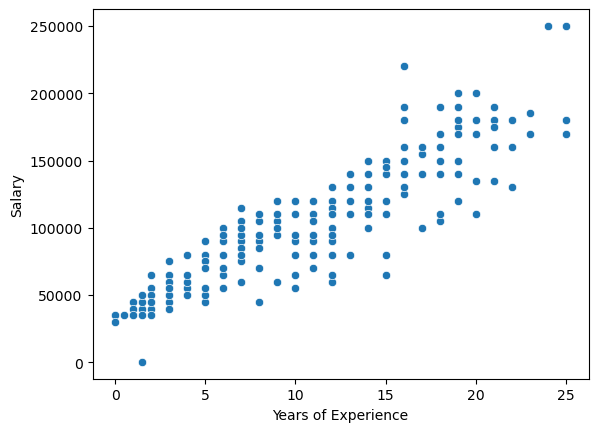

In [43]:
sns.scatterplot(x='Years of Experience', y='Salary', data = data)
plt.show()

In [51]:
X = data[['Years of Experience']]
y = data['Salary']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predict salaries on the test set
y_pred = model.predict(X_test)

In [61]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

R-squared: 0.7735
Mean Squared Error: 672042565.3339


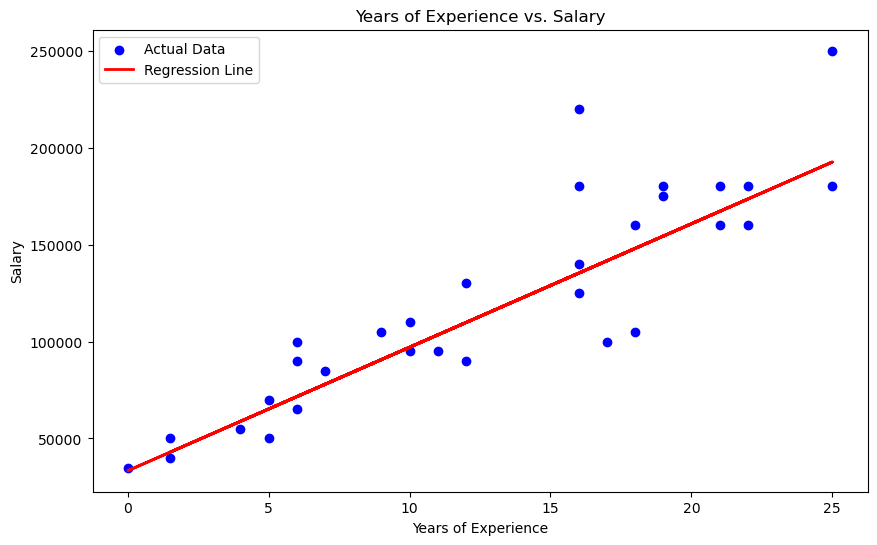

In [63]:
# Plotting the regression line
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

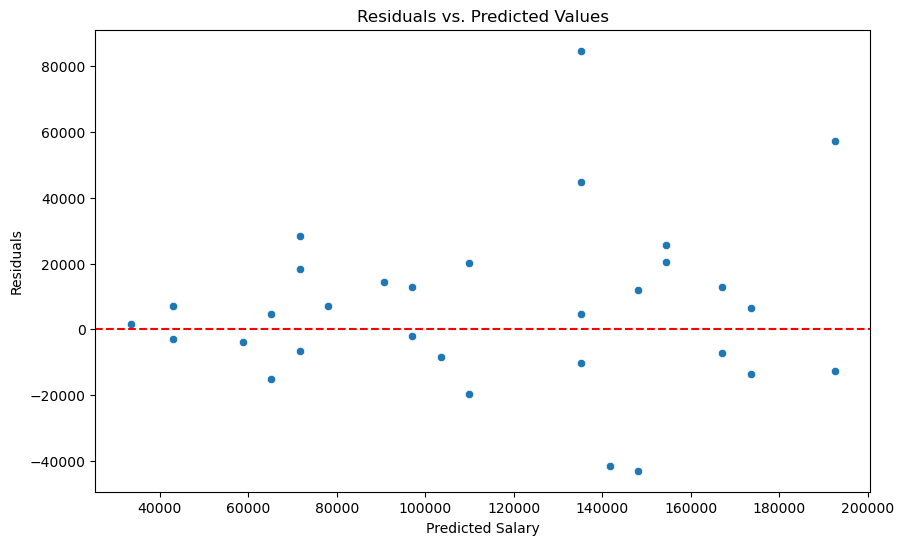

In [65]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.show()